# Handwriting Digit Recognition
- Based on the article by Amitrajit Bose 
- (https://medium.com/@amitrajit_bose/handwritten-digit-mnist-pytorch-977b5338e627)
- This code uses the MNIST digit dataset that is avaialbe through Pytorch

### Necessary Installs and Imports

Python has several machine learning packages to enable the programmer to easily build machine learning models. You are familiar with Scikit-learn, however, as a result of the rise in interest in neural networks and deep learning, several new packages have been created to help developers. These include TensorFlow from Google and Pytorch from meta. Both packages offer extensive libraries to enable the developer to build interesting and innovative AI models.

In [ ]:
# Install Pytorch
#%pip install torch==2.6.0
#%pip install torchvision==0.21.0
#%pip install torchaudio==2.6.0

## Please analyse and run the following commands

In [1]:
# Import necessary packages
# Import packages to visaulise the data
import matplotlib.pyplot as plt
from time import time
import os

# These are the packages for Pytorch and numpy
import numpy as np
import torch
from torchvision import datasets, transforms
from torch import nn
from torch import optim


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.0 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "c:\conda-data\envs\torch\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "c:\conda-data\envs\torch\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "c:\conda-data\envs\torch\lib\site-packages\ipykernel_launcher.py", line 18, in <module>
    app.launch_new_instance()
  File "c:\conda-data\envs\torch\lib\site-packages\traitlets\config\application.py", line 1075, in launch_instance
    app.start()
  File "c:\conda-data\envs\torch\lib\site-pac

### Download The Dataset & Define The Transforms
- We use the transforms package to normalise and convert the data into tensor 
- we pass this to the dataset. MNIST frunction 
- If the data is not alrready downloaded the MNIST function will do it
- We create test and traing data and load them using the DataLoader class

In [5]:
# create directory to store data
my_dr = "\\MNIST\\"


# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Download and load the training data
trainset = datasets.MNIST(my_dr, download=True, train=True, transform=transform)
valset = datasets.MNIST(my_dr, download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

NameError: name 'transforms' is not defined

### Exploring The Data
We get the next image out for the training loader and look at its shape and size

In [16]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
#print(type(images))
#print(images.shape)
#print(labels.shape)


RuntimeError: Numpy is not available

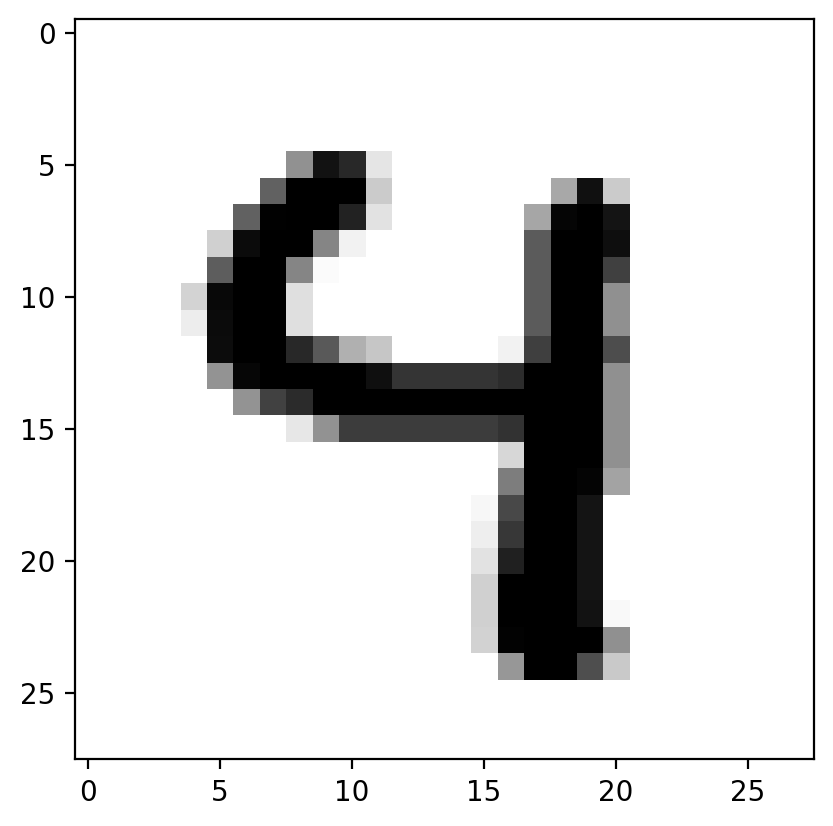

In [ ]:
# We show the image to see what it looks like
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');
plt.show()

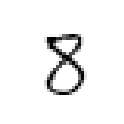

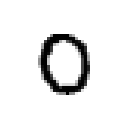

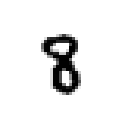

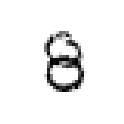

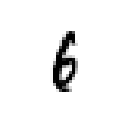

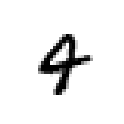

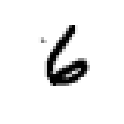

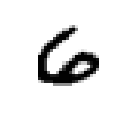

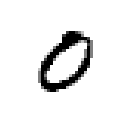

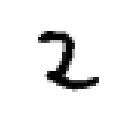

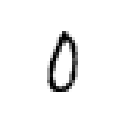

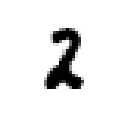

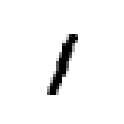

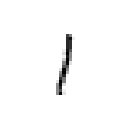

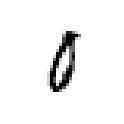

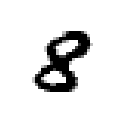

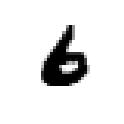

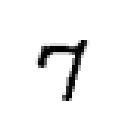

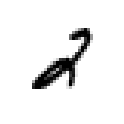

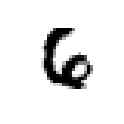

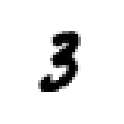

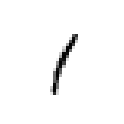

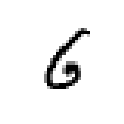

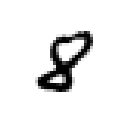

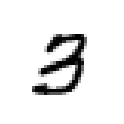

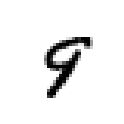

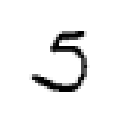

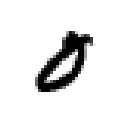

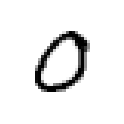

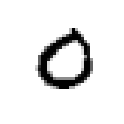

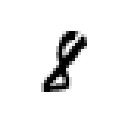

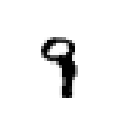

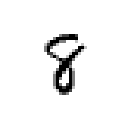

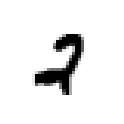

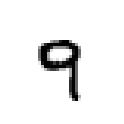

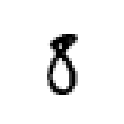

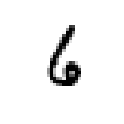

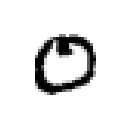

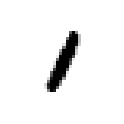

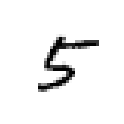

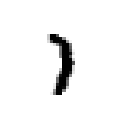

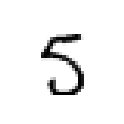

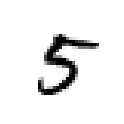

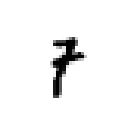

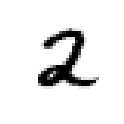

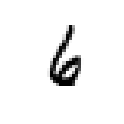

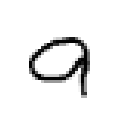

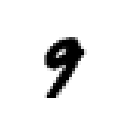

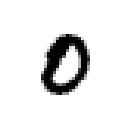

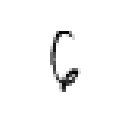

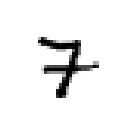

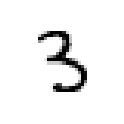

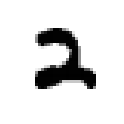

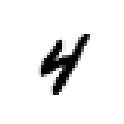

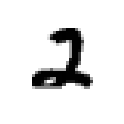

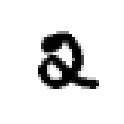

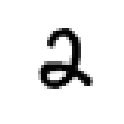

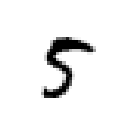

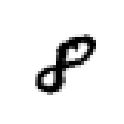

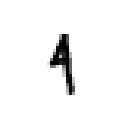

In [ ]:
#we show 60 images to give an example of what we are training on
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
    plt.show()

### Defining The Neural Network
The picture below shows the Neural Network we will build

![](https://raw.githubusercontent.com/dmlc/web-data/master/mxnet/image/mlp_mnist.png)

In [ ]:
# Set device cuda for GPU if it's available otherwise run on the CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### We define the network using torch.nn.Sequential
- The log softtmax function is the log of the softmax function 
- When used on conjuntion with nn.NLLLoss() function This has the same effect as Cross-entropy

In [ ]:
# Layer details for the neural network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1)).to(device)

#Here we print out the network we just defined
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


### We define the loos function as The negative log likelihood loss. 
- It is useful to train a classification problem
- https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html

In [ ]:
criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

### We print the weight before and after a backward
This helps us check that our network is working

In [ ]:
print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
        [-0.0015, -0.0015, -0.0015,  ..., -0.0015, -0.0015, -0.0015],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011]])


### We use Stochastic gradient descent as the optimiser
- You might want to try other optimsers to see how well they perform
- Try Adam https://arxiv.org/abs/1412.6980
- https://pytorch.org/docs/stable/generated/torch.optim.Adam.html

In [ ]:
# Optimizers require the parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [ ]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[ 0.0138,  0.0067,  0.0019,  ...,  0.0274,  0.0271,  0.0273],
        [ 0.0172, -0.0049,  0.0207,  ...,  0.0252,  0.0232,  0.0050],
        [-0.0261, -0.0308, -0.0181,  ...,  0.0018, -0.0340,  0.0205],
        ...,
        [ 0.0156, -0.0315,  0.0032,  ..., -0.0193,  0.0331,  0.0107],
        [-0.0231, -0.0207, -0.0339,  ...,  0.0235, -0.0349, -0.0341],
        [-0.0134, -0.0009, -0.0291,  ..., -0.0308,  0.0003, -0.0292]],
       requires_grad=True)
Gradient - tensor([[ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0018, -0.0018, -0.0018,  ..., -0.0018, -0.0018, -0.0018],
        [ 0.0038,  0.0038,  0.0038,  ...,  0.0038,  0.0038,  0.0038],
        ...,
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003],
        [ 0.0015,  0.0015,  0.0015,  ...,  0.0015,  0.0015,  0.0015],
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004]])


In [ ]:
# Take an update step and few the new weights
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[ 0.0138,  0.0067,  0.0019,  ...,  0.0274,  0.0271,  0.0273],
        [ 0.0172, -0.0048,  0.0208,  ...,  0.0253,  0.0233,  0.0050],
        [-0.0261, -0.0308, -0.0182,  ...,  0.0018, -0.0340,  0.0205],
        ...,
        [ 0.0156, -0.0315,  0.0032,  ..., -0.0193,  0.0331,  0.0107],
        [-0.0231, -0.0207, -0.0339,  ...,  0.0235, -0.0350, -0.0341],
        [-0.0134, -0.0009, -0.0291,  ..., -0.0307,  0.0003, -0.0292]],
       requires_grad=True)


### Core Training Of Neural Network
- The image is turned into one long 784 element vector. This is so the network can train on the images

In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)


Epoch 0 - Training loss: 0.6418624586546853
Epoch 1 - Training loss: 0.28063907819802064
Epoch 2 - Training loss: 0.22018498320108665
Epoch 3 - Training loss: 0.1778529519910243
Epoch 4 - Training loss: 0.1485554089884895
Epoch 5 - Training loss: 0.12862046918611347
Epoch 6 - Training loss: 0.11255131998081515
Epoch 7 - Training loss: 0.09906973762374156
Epoch 8 - Training loss: 0.08858936560004632
Epoch 9 - Training loss: 0.08080305927284141
Epoch 10 - Training loss: 0.07347845120369387
Epoch 11 - Training loss: 0.06766325698099108
Epoch 12 - Training loss: 0.06246824278238057
Epoch 13 - Training loss: 0.05699881367923529
Epoch 14 - Training loss: 0.051824794818601534

Training Time (in minutes) = 6.918232540289561


### A function to show a classfied image to see if predicts correctly

In [ ]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()
    plt.show()

### Visually checking that the classfier is working

Predicted Digit = 6


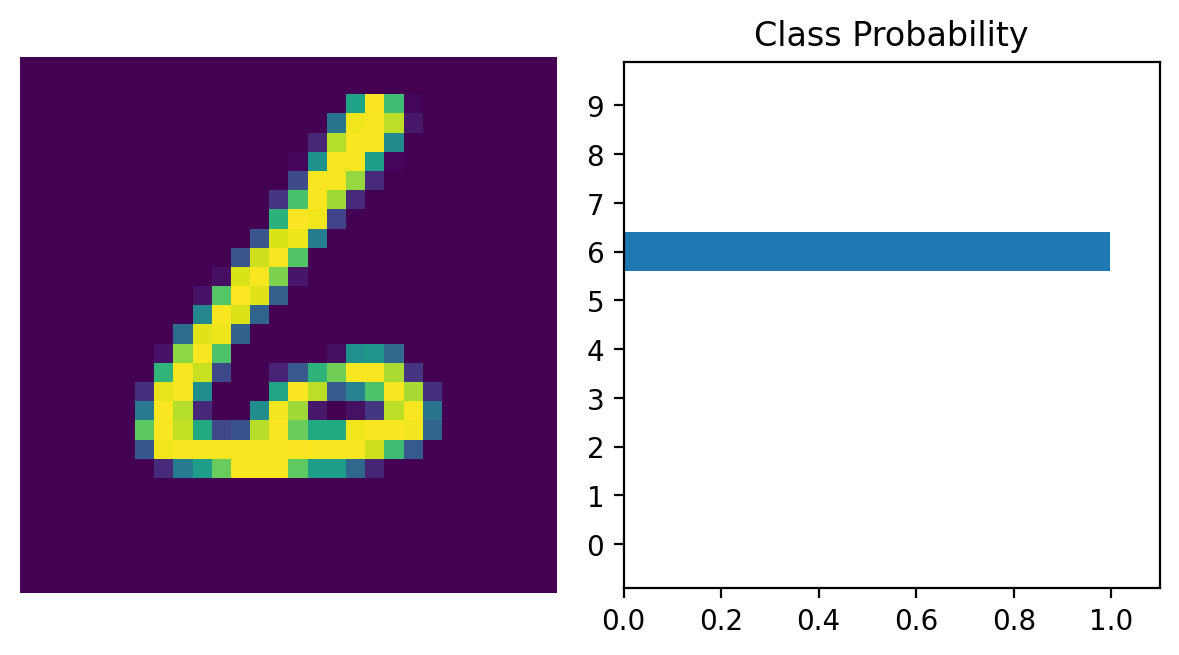

In [ ]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

### Model Evaluation
We measure the percentage of correctly classifies images

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Turn off gradients to speed up this part
    with torch.no_grad():
        logps = model(img)

    # Output of the network are log-probabilities, need to take exponential for probabilities
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.974


### Well done!

## Now try to build and train new ANNs using different structures and activation functions.

In [ ]:
# Add your code here

In [ ]:
# Add your code here

In [ ]:
# Add your code here